In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KernelDensity

In [2]:
df=pd.read_csv('../input/smoke-detect/smoke_detection_iot.csv')

In [3]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [4]:
df.shape # row=62630, and columns=16

(62630, 16)

Feature Description
1- UTC : The time when experiment was performed.

2- Temperature : Temperature of Surroundings. Measured in Celsius

3- Humidity : The air humidity during the experiment.

4- TVOC : Total Volatile Organic Compounds. Measured in ppb (parts per billion)

5- eCo2 : CO2 equivalent concentration. Measured in ppm (parts per million)

6- Raw H2 : The amount of Raw Hydrogen present in the surroundings.

 Raw Ethanol : The amount of Raw Ethanol present in the surroundings.
8- Pressure : Air pressure. Measured in hPa

9- PM1.0 : Paticulate matter of diameter less than 1.0 micrometer .

10- PM2.5 : Paticulate matter of diameter less than 2.5 micrometer.

11- NC0.5 : Concentration of particulate matter of diameter less than 0.5 micrometers.

12- NC1.0 : Concentration of particulate matter of diameter less than 1.0

13- NC2.5 : Concentration of particulate matter of diameter less than 2.5 micrometers.
14- CNT : Simple Count.

15- Fire Alarm : (Reality) If fire was present then value is 1 else it is 0.¶

In [5]:
df.isnull().sum() # just to see is there any missing value = no missing value is there.

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [6]:
df.columns # total numbers of columns =16

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


Exploratory Data Analysis

In [8]:
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


observations from df.describe -

1 Temperature[C] - here mean is 15 and std is 14 it means that  the values of this column may have high variations.

2Humidity[%]	- here mean is 48 and std is 8 it means max values are near with mean, with few variations.

3Pressure[hPa]	- here maen value is 938 and std is 1 it means allthe values of this column is near to average.min =930 and max=936

In [9]:
df1=df.drop(columns=['UTC','CNT', 'Unnamed: 0'] ,axis=1)

In [10]:
df1.shape

(62630, 13)

now we have removed 'UTC','CNT', 'Unnamed: 0' because this columns were not important.now we have rows=62630 and columns=13
and our data frame=df1

In [11]:
df1.corr() # to find co relation between columns

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.084916
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.128118


heat map plot for EDA

<AxesSubplot:>

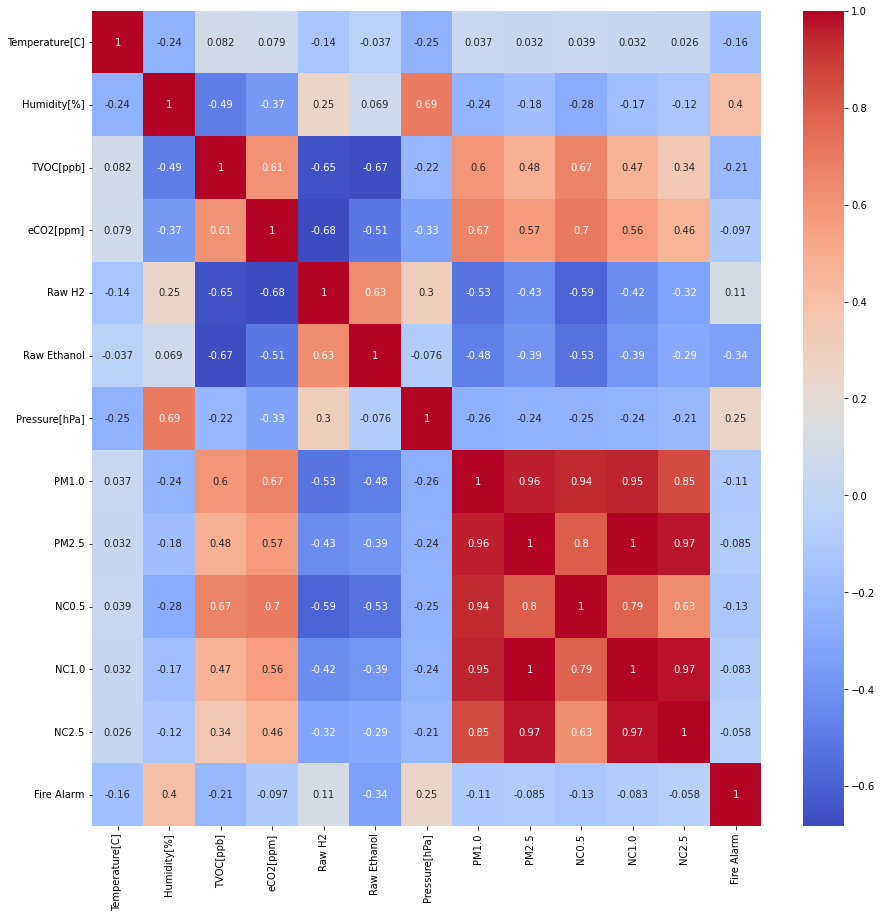

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap( df1.corr(),cmap='coolwarm', annot=True )

observations from df.corr()

unnamed and utc are not much importnat columns.

1-I found strong and postive  correlation between humidity and pressure which is 0.69 

2- TVOC (ppb) is postively and strong co related with NCO.5

3-eCO2 is positive and strong  co-related with pm1.0 

4-All the PM's and NC's have high correlation with each other.

<AxesSubplot:xlabel='Pressure[hPa]', ylabel='Density'>

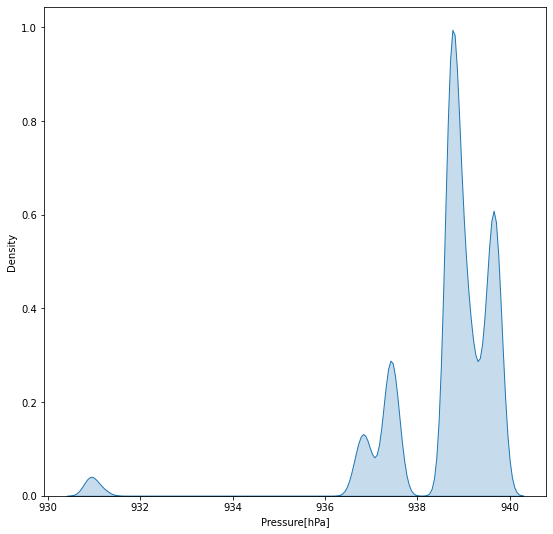

In [13]:
plt.figure(figsize=(9,9))
sns.kdeplot(data=df1,x='Pressure[hPa]',shade='fill' )

<AxesSubplot:xlabel='Humidity[%]', ylabel='Density'>

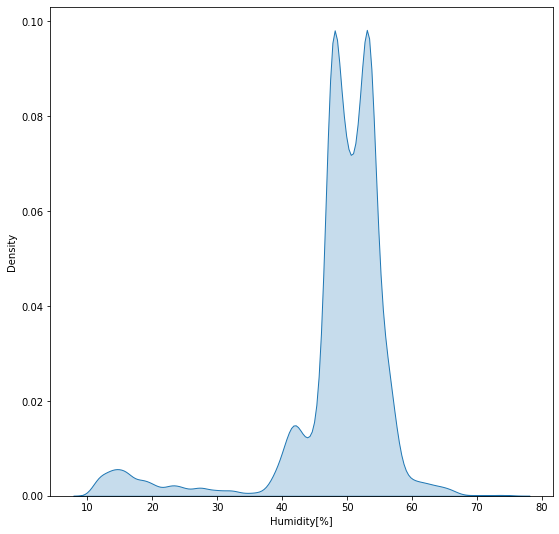

In [14]:
plt.figure(figsize=(9,9))
sns.kdeplot(data=df1, x='Humidity[%]', shade='fill')


now will check for outliers


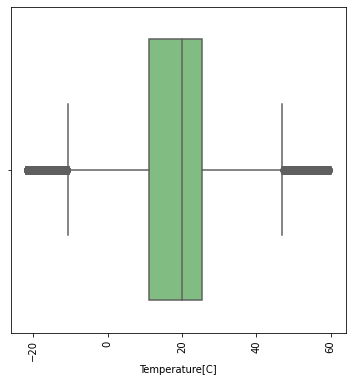

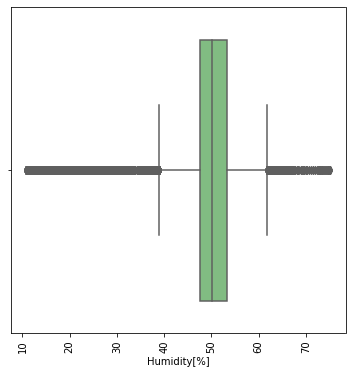

In [15]:
df2 = df1[['Temperature[C]','Humidity[%]']]
for i in df2.columns:
  plt.figure(figsize=(6,6))
  sns.boxplot(x=df1[i][1:], data=df1.iloc[:1],
                order=df2[i][1:].value_counts().index,
                palette='YlGn')
  plt.xticks(rotation=90)
  plt.show()

by boxplot we can see that max outlier are there with this columns.

earlier by df.describe we found that tempreature having mean is 14 and and std is 15 this relationship is showing highier variations with the values. same with the humidity outliers are visible by boxplot.

DATA SPLITTING AND SCALING (DATA PREPROCESSING)


In [16]:
x = df1.iloc[:,:-1]
y = df1['Fire Alarm']  

In [17]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

In [18]:
sc=StandardScaler() # i am using standard scaler any other transformation may be applied.
x_traintrans=sc.fit_transform(x_train)
x_testtrans=sc.transform(x_test)

DATA MODELLING

In [19]:
knn=KNeighborsClassifier() # i am using k nearest neighbour and getting r2score 0.99 which is best.it menas our model is performing well on this data set.
knn.fit(x_traintrans, y_train)
y_pred=knn.predict(x_testtrans)
r2_score(y_test,y_pred)


0.9952510555131934

In [20]:
ramf=RandomForestClassifier() 
ramf.fit(x_traintrans, y_train)
y_pred=ramf.predict(x_testtrans)
r2_score(y_test,y_pred)


1.0

we used two models first is kNN and second is random forest, both the model perform well after transformation.

knn giving r2 score around= 0.99

random forest giving r2 score= 1.0

it means for highier accuracy randomforest is best model over this data set.